<a href="https://colab.research.google.com/github/ashwinkhapre/FMML-Projects_Ashwin_Khapre/blob/main/ASHWIN_KHAPRE_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


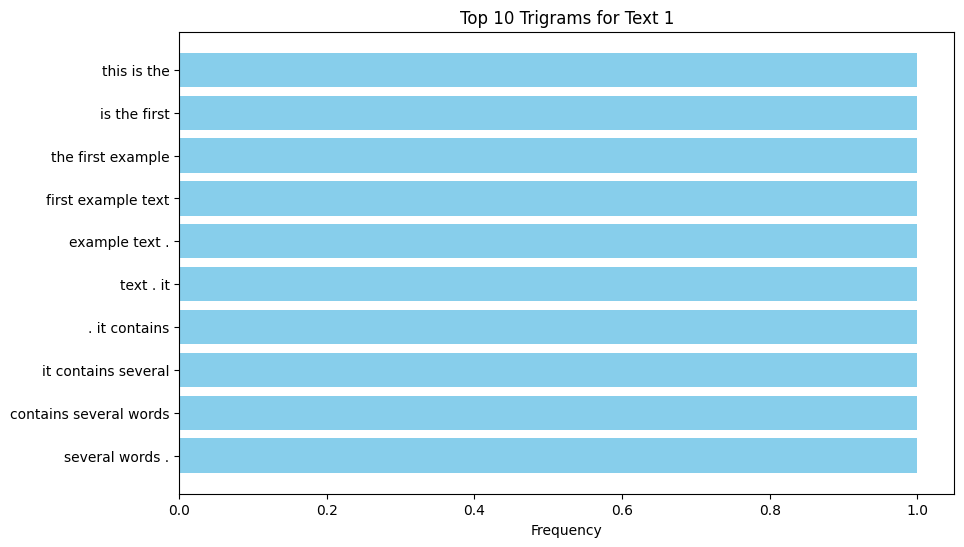

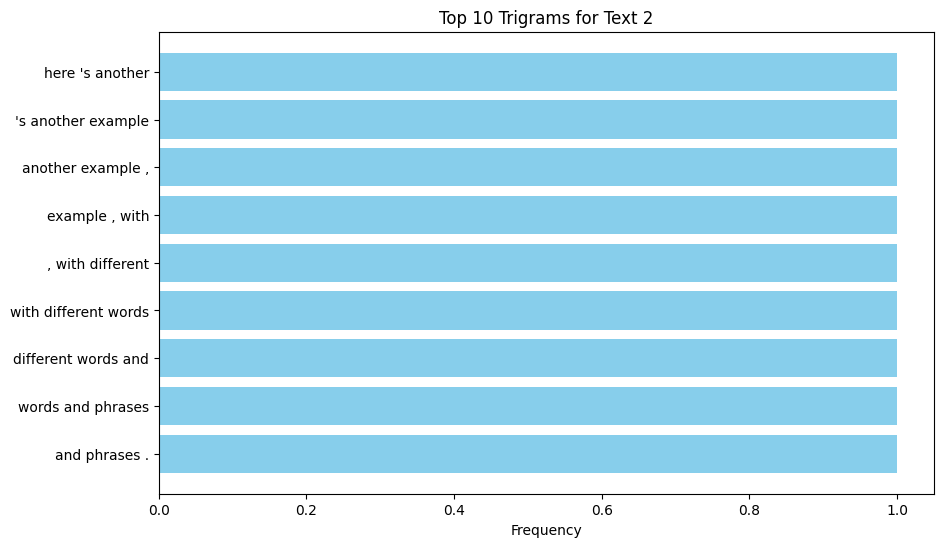

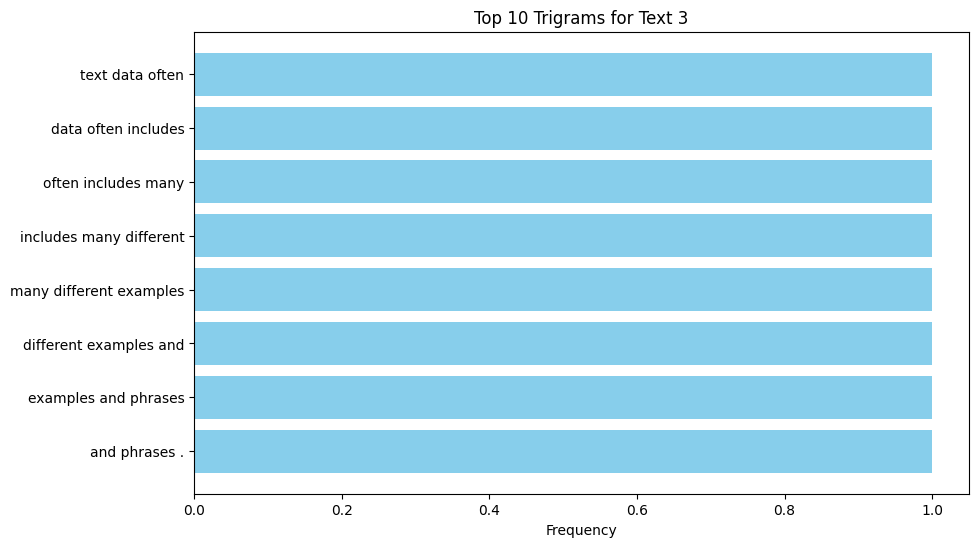

In [4]:
import nltk
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt

# Download NLTK data if not already downloaded
nltk.download('punkt')

# Example texts
texts = [
    "This is the first example text. It contains several words.",
    "Here's another example, with different words and phrases.",
    "Text data often includes many different examples and phrases."
]

def get_top_trigrams(text, top_n=10):
    # Tokenize and normalize text
    tokens = word_tokenize(text.lower())

    # Generate trigrams
    trigrams = list(ngrams(tokens, 3))

    # Count frequencies of trigrams
    trigram_freq = Counter(trigrams)

    return trigram_freq.most_common(top_n)

def plot_trigrams(trigrams, title):
    trigrams, counts = zip(*trigrams)
    trigrams = [' '.join(trigram) for trigram in trigrams]

    plt.figure(figsize=(10, 6))
    plt.barh(trigrams, counts, color='skyblue')
    plt.xlabel('Frequency')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

# Process each text and plot
for i, text in enumerate(texts):
    try:
        top_trigrams = get_top_trigrams(text)
        plot_trigrams(top_trigrams, f"Top 10 Trigrams for Text {i+1}")
    except Exception as e:
        print(f"An error occurred while processing text {i+1}: {e}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


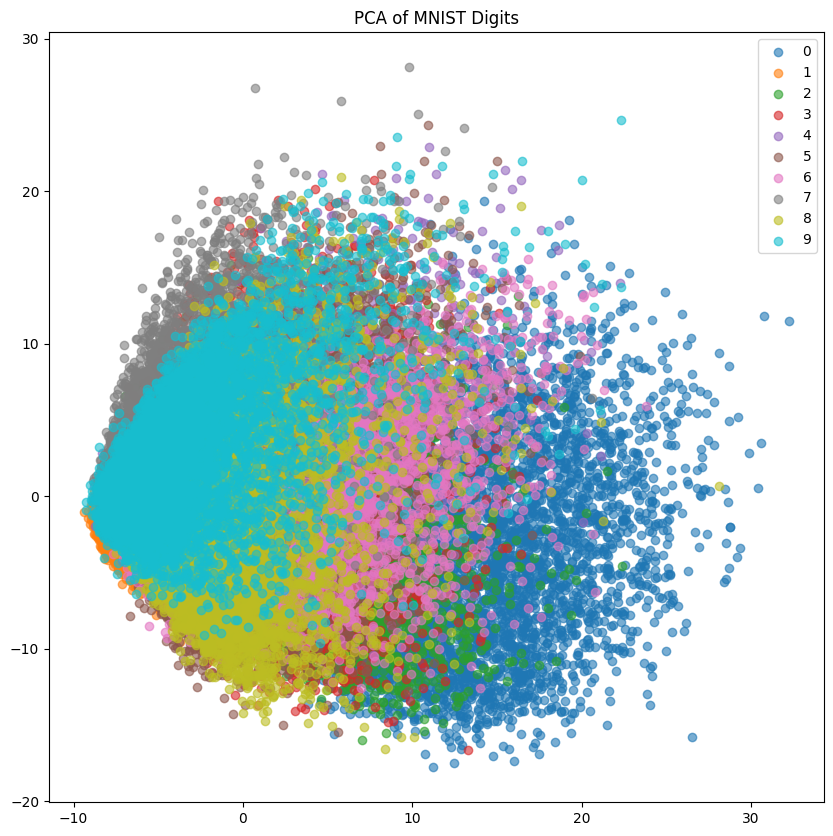

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten the images and scale the data
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)
scaler = StandardScaler()
x_train_flat_scaled = scaler.fit_transform(x_train_flat)

# Function to plot the results
def plot_embedding(X, y, title=None):
    plt.figure(figsize=(10, 10))
    for i in range(10):
        indices = y == i
        plt.scatter(X[indices, 0], X[indices, 1], label=str(i), alpha=0.6)
    plt.legend()
    if title is not None:
        plt.title(title)
    plt.show()

# Perform PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_train_flat_scaled)
plot_embedding(x_pca, y_train, title="PCA of MNIST Digits")

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
x_tsne = tsne.fit_transform(x_train_flat_scaled)
plot_embedding(x_tsne, y_train, title="t-SNE of MNIST Digits")